<img src="https://images.unsplash.com/photo-1446776709462-d6b525c57bd3?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" height=500>

###### Source: NASA via Unsplash

# Analyzing and Visualizing the Space Race

### 0. Setup

#### 0.1 Import Statements

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statistics
from scipy.stats import skew

#### 0.2 Notebook Formatting

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### 1. Understanding The Problem

#### 1.1 Historical Context

The Space Race, which began in the 1950s between the United States and the Soviet Union, holds significant historical relevance. This period marked a pivotal point in human achievement, where technological and scientific advancements pushed the boundaries of exploration and innovation. The drive to explore space was not only a pursuit of scientific discovery but also a critical demonstration of national power and technological supremacy amid Cold War tensions.

From a societal perspective, the Space Race fueled global fascination and inspired generations to pursue careers in science, technology, engineering, and mathematics (STEM). Economically, the competition led to substantial government investments in research and development, catalyzing advancements in computing, telecommunications, and materials science, which laid the groundwork for modern industries. Politically, space achievements were leveraged to project ideological superiority, demonstrating the geopolitical power of each nation. This technological rivalry eventually fostered international collaborations, including the formation of space agencies and joint missions, reflecting a shift from competition to cooperation in the post-Cold War era.

### 2. Data Collection And Cleaning

The main data used for the analysis is a dataset made available through Kaggle by LaCla3D (https://www.kaggle.com/datasets/agirlcoding/all-space-missions-from-1957) which was webscraped from https://nextspaceflight.com/launches/past/?page=1. The dataset was downloaded and stored directly in the project folder as "space_race_data.csv".

#### 2.1 Load Data

In [4]:
data = pd.read_csv('./space_race_data.csv')

#### 2.2 Understanding, And Adjusting The Dataset

Here I checked the first few lines to see what kind of data is available:

In [5]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


Checked the original number of rows and columns.

In [6]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 4324 rows and 9 columns.


##### 2.2.1 Check for NaN and duplicated values

In [7]:
print(f'Any NaN values on the dataset? {data.isnull().values.any()}')
print(f'Any duplicated values on the dataset? {data.duplicated().values.any()}')

Any NaN values on the dataset? True
Any duplicated values on the dataset? False


##### 2.2.2. Drop duplicates

In [8]:
data.drop_duplicates(inplace=True)
print(f'Any duplicated values on the dataset? {data.duplicated().values.any()}')

Any duplicated values on the dataset? False


Checked which data types were the dataset columns originally.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


##### 2.2.3. Key observations on cleaning that needs to be done
- The first two columns seem to be just repetitions of the dataset's index, they can be dropped.
- Column labels can be simplified
- Data types need to be adjusted for some columns

##### 2.2.4. Dropping Columns with Repeated Index

In [10]:
data.drop(labels=['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)
data.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


##### 2.2.5. Rename Columns

In [11]:
data.rename(columns={'Company Name':'company',
                     'Location':'location',
                     'Datum':'date',
                     'Detail':'rocket_name',
                     'Status Rocket':'rocket_status',
                     ' Rocket':'mission_cost',
                     'Status Mission':'mission_status'}, inplace=True)
data.head()

,company,location,date,rocket_name,rocket_status,mission_cost,mission_status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


##### 2.2.6. Description of the dataset's columns
- **company** : The name of the company that has launched the rocket.
- **location** : The location where the launch took place.
- **date** : The date when the launch took place.
- **rocket_name** : The name of the rocket.
- **rocket_status** : Indicates whether the rocket is still active or not.
- **mission_cost** : How much has the launch costed in $ million.
- **mission_status** : Indicates whether the rocket launch succeeded or failed.

##### 2.2.7. Convert date to datetime and add "year" column

In [12]:
data.date = pd.to_datetime(data.date, 
                           format='mixed', 
                           utc=True).dt.strftime('%Y-%m-%d')
data.date = pd.to_datetime(data.date)
data.head()


,company,location,date,rocket_name,rocket_status,mission_cost,mission_status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [13]:
data['year'] = data.date.dt.year
data.head()

,company,location,date,rocket_name,rocket_status,mission_cost,mission_status,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020


##### 2.2.8. Convert mission costs to float

In [14]:
data.mission_cost = data.mission_cost.str.replace(',','')
data.mission_cost = pd.to_numeric(data.mission_cost)

##### 2.2.9. Extract country from location column

In [15]:
data['country'] = data.location.str.split().str[-1]
data.head()

,company,location,date,rocket_name,rocket_status,mission_cost,mission_status,year,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,USA


##### 2.2.10. Replace NaN values on mission_cost by column average

In [16]:
data.fillna({'mission_cost':data.mission_cost.mean()}, inplace=True)
data.head()

,company,location,date,rocket_name,rocket_status,mission_cost,mission_status,year,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,153.79,Success,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,USA


### 3. Exploratory Analysis

#### 3.1. Total Number of Launches Through Time

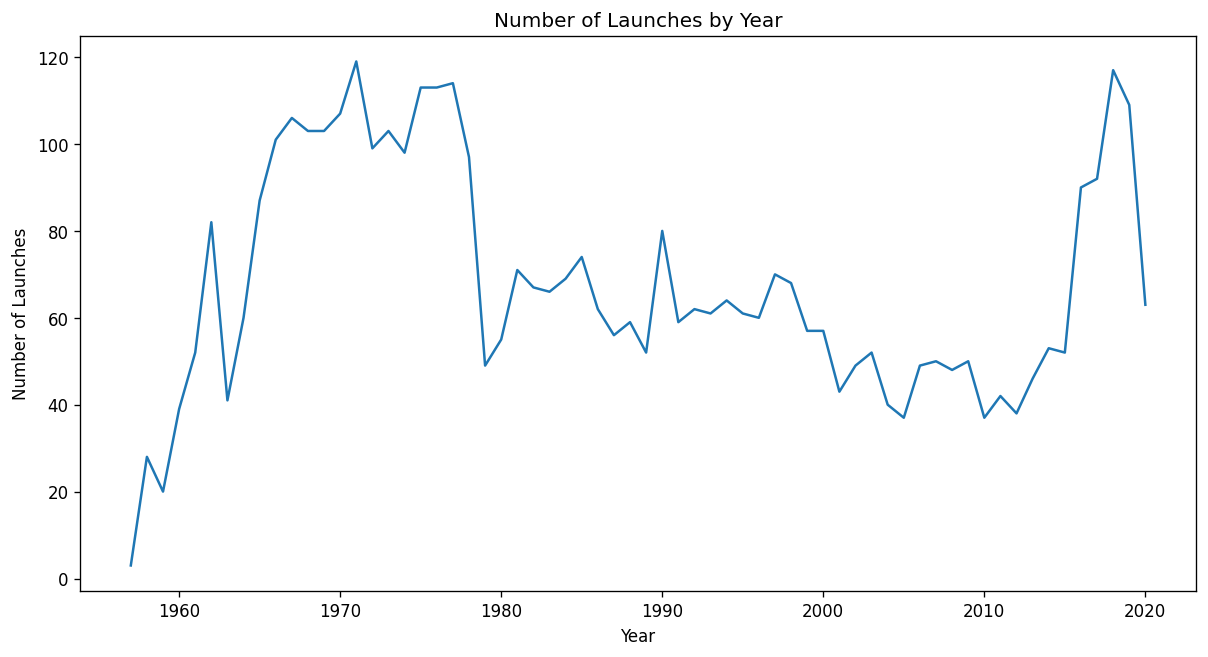

In [17]:
launches_by_year = data.date.dt.year.value_counts().sort_index()
launches_by_year

plt.figure(figsize=(12,6), dpi=120)
plt.title('Number of Launches by Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')

plt.plot(launches_by_year)

plt.show()

#### 3.2. How many launches has each country launched?

In [18]:
top_countries = data.country.value_counts().sort_values()

bar = px.bar(top_countries,
             orientation='h')
bar.update_layout(title='Space Race - Number of launches by country',
                  xaxis_title='Number of Launches',
                  yaxis_title='Country',
                  showlegend=False)

bar.show()

#### 3.3. Number of Launches Through Time by Country

In [19]:
launches_by_year_and_country = data[['date','country','year']]
launches_by_year_and_country = launches_by_year_and_country.groupby(['year','country'], as_index=False).agg({'date':pd.Series.count})
launches_by_year_and_country.rename(columns={'date':'count'}, inplace=True)

line = px.line(launches_by_year_and_country,
               x='year',
               y='count',
               color='country',
               title='Number of Launches Through Time by Country',
               width=1400,
               height=800)

line.update_layout(xaxis_title='Year',
                   yaxis_title='Number of Launches')

line.show()

#### 3.4. Success Rate of Rocket Launches

In [20]:
mission_status_df = data[['year','country','location','mission_status']]
mission_status_df = mission_status_df.groupby(['year','country','mission_status'], as_index=False).agg({'location':pd.Series.count})
mission_status_df.rename(columns={'location':'number_missions'}, inplace=True)
mission_status_df


,year,country,mission_status,number_missions
0,1957,Kazakhstan,Success,2
1,1957,USA,Failure,1
2,1958,Kazakhstan,Failure,4
3,1958,Kazakhstan,Success,1
4,1958,USA,Failure,16
...,...,...,...,...
632,2020,Site,Success,1
633,2020,USA,Failure,1
634,2020,USA,Success,20
635,2020,Zealand,Failure,1


##### 3.4.1. Number of missions by status and country through time

In [21]:
scatter = px.scatter(mission_status_df,
             x = 'year',
             y='number_missions',
             size = 'number_missions',
             color='mission_status',
             title='Scatter Plot - Mission Status',
             width=1400,
             height=700)

scatter.update_layout(xaxis_title='Year',
                   yaxis_title='Number of Missions')

scatter.show()

##### 3.4.2. Mission status for the top 5 countries with most launches

In [22]:
top5_countries = top_countries.index.to_list()[-5:]
top5_countries
country_mission_status = data[['year','country','mission_status']].sort_values(by='year')
country_mission_status = country_mission_status.groupby(['country','mission_status'], as_index=False).count()
country_mission_status.rename(columns={'year':'count'}, inplace=True)
country_mission_status

bar = px.bar(country_mission_status[country_mission_status['country'].isin(top5_countries)],
         x='country',
         y='count',
         color='mission_status')

bar.show()

#### 3.5 Mission Costs

##### 3.5.1. Costs through time

In [23]:
data.head()

,company,location,date,rocket_name,rocket_status,mission_cost,mission_status,year,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,StatusActive,153.79,Success,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,USA


In [55]:
costs_through_time = data[['year', 'mission_cost']].groupby('year', as_index=False).sum()

bar = px.bar(costs_through_time,
             'year',
             'mission_cost',
             title='Mission Costs through time (in $ million)',
             height=700)

bar.update_layout(xaxis_title='Year',
                  yaxis_title='Mission Cost (in $million)')
bar.show()

##### 3.5.2. Cost through time for top 5 countries in spending

In [54]:
costs_through_time_by_country = data[['year','country','mission_cost']].groupby(['year','country'], as_index=False)['mission_cost'].sum()
costs_through_time_by_country.head()
bar = px.bar(costs_through_time_by_country[costs_through_time_by_country['country'].isin(top5_countries)],
             x='year',
             y='mission_cost',
             color='country',
             title='Mission Costs through time (in $ million)',
             height=700)

bar.update_layout(xaxis_title='Year',
                  yaxis_title='Mission Cost (in $million)')
bar.show()